In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
frame = cv.imread("./002.jpg")

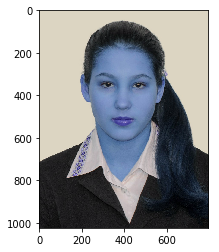

In [33]:
plt.imshow(frame);

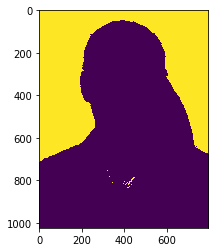

In [81]:
color = frame[10, 10]

lower_border = np.array(list(color - 10), dtype = "uint16")
upper_border = np.array(list(color + 10), dtype = "uint16")
black_mask = cv.inRange(frame, lower_border, upper_border)
plt.imshow(black_mask);

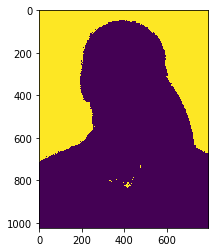

In [88]:
gray = cv.cvtColor(frame.copy(), cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_TRIANGLE)
plt.imshow(thresh);

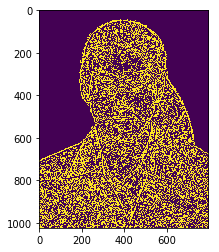

In [128]:
img_grey = cv.cvtColor(frame.copy(), cv.COLOR_BGR2GRAY)
th3 = cv.adaptiveThreshold(img_grey, 255, 
                           cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                           cv.THRESH_BINARY, 11, 0)
plt.imshow(th3);